Spotify Analysis

In [15]:
import os
import json
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Define the path to your folder containing JSON files
folder_path = 'archive/data'  # Adjust the path as needed

# Initialize a list to store data
playlists_data = []

# Counter to keep track of the number of files read
file_count = 0

# Loop through each file in the directory, but only read the first 50 JSON files
for file_name in os.listdir(folder_path):
    if file_name.endswith('.json'):  # Check if the file is a JSON file
        file_path = os.path.join(folder_path, file_name)
        # Read the JSON file
        with open(file_path, 'r') as file:
            data = json.load(file)
            playlists = data['playlists']  # Extract playlists data
            
            # Loop through each playlist
            for playlist in playlists:
                # Extract general playlist information
                playlist_info = {
                    'name': playlist['name'],
                    'collaborative': playlist['collaborative'],
                    'pid': playlist['pid'],
                    'modified_at': playlist['modified_at'],
                    'num_tracks': playlist['num_tracks'],
                    'num_albums': playlist['num_albums'],
                    'num_followers': playlist['num_followers'],
                    'num_edits': playlist['num_edits'],
                    'duration_ms': playlist['duration_ms'],
                    'num_artists': playlist['num_artists'],
                    'description': playlist.get('description', 'No description')
                }
                
                # Loop through each track in the playlist's tracks
                for track in playlist['tracks']:
                    # Combine playlist info with track info
                    track_info = {
                        **playlist_info,  # Include all playlist-level data
                        'track_pos': track['pos'],
                        'artist_name': track['artist_name'],
                        'track_uri': track['track_uri'],
                        'track_name': track['track_name'],
                        'album_uri': track['album_uri'],
                        'duration_ms_track': track['duration_ms'],
                        'album_name': track['album_name']
                    }
                    # Append combined data to the list
                    playlists_data.append(track_info)

        file_count += 1
        if file_count == 10:  # Stop after reading 50 files
            break

# Convert the list to a DataFrame
df = pd.DataFrame(playlists_data)

# Display the DataFrame
print(df.head(2))
df.info()





         name collaborative  pid  modified_at  num_tracks  num_albums  \
0  Throwbacks         false    0   1493424000          52          47   
1  Throwbacks         false    0   1493424000          52          47   

   num_followers  num_edits  duration_ms  num_artists     description  \
0              1          6     11532414           37  No description   
1              1          6     11532414           37  No description   

   track_pos     artist_name                             track_uri  \
0          0   Missy Elliott  spotify:track:0UaMYEvWZi0ZqiDOoHU3YI   
1          1  Britney Spears  spotify:track:6I9VzXrHxO9rA9A5euc8Ak   

                                   track_name  \
0  Lose Control (feat. Ciara & Fat Man Scoop)   
1                                       Toxic   

                              album_uri  duration_ms_track    album_name  
0  spotify:album:6vV5UrXcfyQD1wu4Qo2I9K             226863  The Cookbook  
1  spotify:album:0z7pVBGOD7HCIB7S8eLkLI            

In [16]:
df.to_csv('final_data.csv', index=False)

In [17]:
# continue with this copy 
import pandas as pd
final_data = pd.read_csv('final_data.csv')
final_data.info()
print(final_data.head(2))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670568 entries, 0 to 670567
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   name               670568 non-null  object
 1   collaborative      670568 non-null  bool  
 2   pid                670568 non-null  int64 
 3   modified_at        670568 non-null  int64 
 4   num_tracks         670568 non-null  int64 
 5   num_albums         670568 non-null  int64 
 6   num_followers      670568 non-null  int64 
 7   num_edits          670568 non-null  int64 
 8   duration_ms        670568 non-null  int64 
 9   num_artists        670568 non-null  int64 
 10  description        670527 non-null  object
 11  track_pos          670568 non-null  int64 
 12  artist_name        670568 non-null  object
 13  track_uri          670568 non-null  object
 14  track_name         670566 non-null  object
 15  album_uri          670568 non-null  object
 16  duration_ms_track  6

In [18]:
null_counts = final_data.isnull().sum()
print(null_counts)

name                  0
collaborative         0
pid                   0
modified_at           0
num_tracks            0
num_albums            0
num_followers         0
num_edits             0
duration_ms           0
num_artists           0
description          41
track_pos             0
artist_name           0
track_uri             0
track_name            2
album_uri             0
duration_ms_track     0
album_name            0
dtype: int64


In [19]:
# handel the missing values
final_data['description'].fillna('No description', inplace=True)

null_counts = final_data.isnull().sum()
print(null_counts)




name                 0
collaborative        0
pid                  0
modified_at          0
num_tracks           0
num_albums           0
num_followers        0
num_edits            0
duration_ms          0
num_artists          0
description          0
track_pos            0
artist_name          0
track_uri            0
track_name           2
album_uri            0
duration_ms_track    0
album_name           0
dtype: int64


C:\Users\weams\AppData\Local\Temp\ipykernel_15240\1586085813.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [20]:
print(final_data.describe())

                 pid   modified_at     num_tracks     num_albums  \
count  670568.000000  6.705680e+05  670568.000000  670568.000000   
mean    73754.563564  1.481313e+09     111.635870      79.496642   
std     45596.217900  3.481149e+07      64.049944      48.264991   
min         0.000000  1.299629e+09       5.000000       2.000000   
25%     10521.000000  1.467245e+09      58.000000      40.000000   
50%    102003.000000  1.496275e+09     102.000000      71.000000   
75%    104510.000000  1.507075e+09     161.000000     112.000000   
max    106999.000000  1.509494e+09     250.000000     237.000000   

       num_followers      num_edits   duration_ms    num_artists  \
count  670568.000000  670568.000000  6.705680e+05  670568.000000   
mean        2.693065      28.513565  2.613773e+07      58.356529   
std        75.538997      28.676620  1.528631e+07      36.909924   
min         1.000000       2.000000  5.556960e+05       3.000000   
25%         1.000000       7.000000  1.341171e+

In [21]:
# Convert 'modified_at' to a datetime format if it's a timestamp
final_data['modified_at'] = pd.to_datetime(final_data['modified_at'], unit='s')
# print(final_data.head(1))

In [22]:
final_data['release_year']=final_data['modified_at'].dt.year

In [23]:
#convert from ms to m
 
final_data['track_duration_m'] = final_data['duration_ms_track'] / (1000 * 60)
# Delete the column 'duration_min'
final_data.drop(columns=['duration_ms_track'], inplace=True)

final_data['duration_m'] = final_data['duration_ms'] / (1000 * 60)
# Delete the column 'duration_min'
final_data.drop(columns=['duration_ms'], inplace=True)

# print(final_data.head())



In [24]:
print(final_data.head(1))

         name  collaborative  pid modified_at  num_tracks  num_albums  \
0  Throwbacks          False    0  2017-04-29          52          47   

   num_followers  num_edits  num_artists     description  track_pos  \
0              1          6           37  No description          0   

     artist_name                             track_uri  \
0  Missy Elliott  spotify:track:0UaMYEvWZi0ZqiDOoHU3YI   

                                   track_name  \
0  Lose Control (feat. Ciara & Fat Man Scoop)   

                              album_uri    album_name  release_year  \
0  spotify:album:6vV5UrXcfyQD1wu4Qo2I9K  The Cookbook          2017   

   track_duration_m  duration_m  
0           3.78105    192.2069  


data visulization


In [25]:
# Distribution of tracks by release year
release_year_distribution = final_data['release_year'].value_counts().reset_index()
release_year_distribution.columns = ['release_year', 'track_count']

print(release_year_distribution.head())
import plotly.express as px
plt.figure(figsize=(4, 4))
fig = px.bar(release_year_distribution, x='release_year', y='track_count',
             title='Distribution of Tracks by Release Year',
             labels={'release_year': 'Release Year', 'track_count': 'Number of Tracks'},
             color='track_count')

fig.show()

   release_year  track_count
0          2017       429467
1          2016       125234
2          2015        61812
3          2014        32882
4          2013        18870


<Figure size 400x400 with 0 Axes>

In [26]:
import pandas as pd

artist_popularity = final_data['artist_name'].value_counts().nlargest(10).reset_index()
artist_popularity.columns = ['artist_name', 'track_count']

print(artist_popularity.head(10))

      artist_name  track_count
0           Drake         9071
1      Kanye West         4327
2  Kendrick Lamar         3459
3         Rihanna         3408
4      The Weeknd         3120
5          Eminem         3081
6          Future         2712
7      Ed Sheeran         2531
8         J. Cole         2470
9         Beyoncé         2419


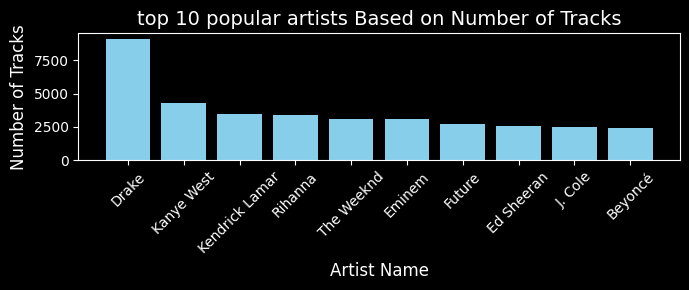

In [27]:
# matplotlib inline

import matplotlib.pyplot as plt


# Create the bar chart
plt.figure(figsize=(7, 3))
plt.bar(artist_popularity['artist_name'], artist_popularity['track_count'], color='skyblue',)

# Ensure no LaTeX interpretation
plt.xlabel('Artist Name', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.title('top 10 popular artists Based on Number of Tracks', fontsize=14)

# Disable LaTeX rendering if not used
plt.rcParams['text.usetex'] = False

# Rotate x-axis labels and ensure layout
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

C:\Users\weams\AppData\Local\Temp\ipykernel_15240\377897984.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




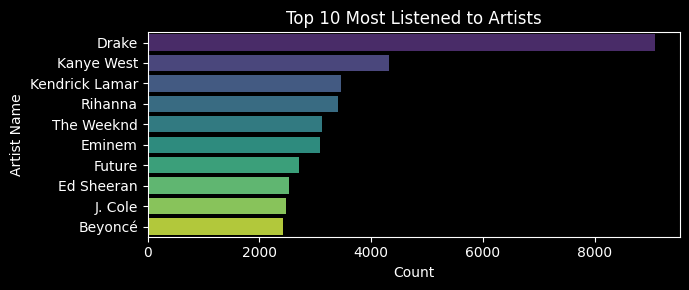

In [28]:
import seaborn as sns
top_artists = final_data['artist_name'].value_counts().nlargest(10).reset_index()
top_artists.columns = ['artist_name', 'count']

plt.figure(figsize=(7, 3))
sns.barplot(x='count', y='artist_name', data=top_artists, palette='viridis')
plt.title('Top 10 Most Listened to Artists')
plt.xlabel('Count')
plt.ylabel('Artist Name')
plt.tight_layout()
plt.show()

C:\Users\weams\AppData\Local\Temp\ipykernel_15240\3410434198.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




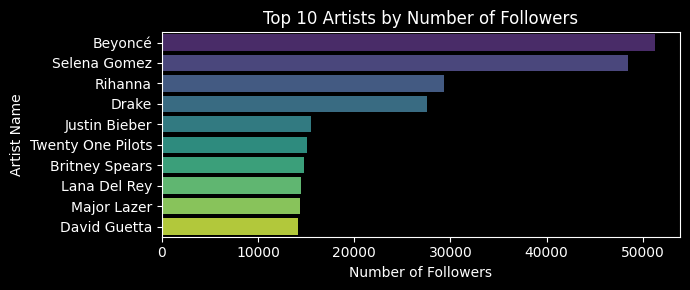

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by artist name and calculate the total number of followers
top_artists_by_followers = final_data.groupby('artist_name')['num_followers'].sum().reset_index()

# Sort the artists by the number of followers in descending order and select the top 10
top_artists_by_followers = top_artists_by_followers.sort_values('num_followers', ascending=False).head(10)

# Plot the top 10 artists by number of followers
plt.figure(figsize=(7, 3))

sns.barplot(x='num_followers', y='artist_name', data=top_artists_by_followers, palette='viridis')
plt.title('Top 10 Artists by Number of Followers')
plt.xlabel('Number of Followers')
plt.ylabel('Artist Name')
plt.tight_layout()
plt.show()


C:\Users\weams\AppData\Local\Temp\ipykernel_15240\1210350608.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




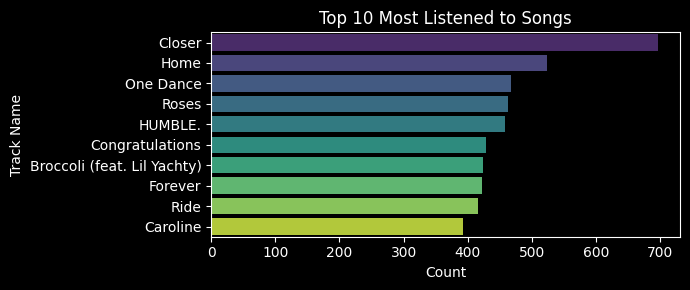

In [30]:
top_songs = final_data['track_name'].value_counts().nlargest(10).reset_index()
top_songs.columns = ['track_name', 'count']

plt.figure(figsize=(7, 3))
sns.barplot(x='count', y='track_name', data=top_songs, palette='viridis')
plt.title('Top 10 Most Listened to Songs')
plt.xlabel('Count')
plt.ylabel('Track Name')
plt.tight_layout()
plt.show()




C:\Users\weams\AppData\Local\Temp\ipykernel_15240\3115851798.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




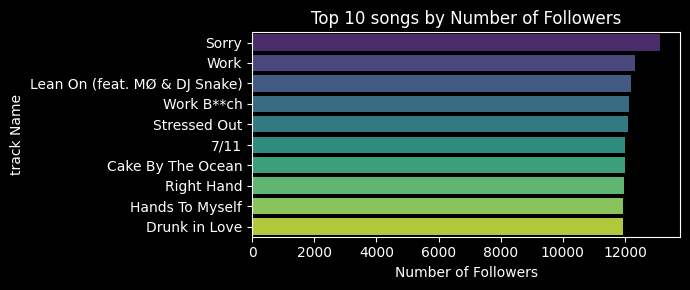

In [31]:
# Group by artist name and calculate the total number of followers
top_songs_by_followers = final_data.groupby('track_name')['num_followers'].sum().reset_index()

# Sort the artists by the number of followers in descending order and select the top 10
top_songs_by_followers = top_songs_by_followers.sort_values('num_followers', ascending=False).head(10)

# Plot the top 10 artists by number of followers
plt.figure(figsize=(7, 3))

sns.barplot(x='num_followers', y='track_name', data=top_songs_by_followers, palette='viridis')
plt.title('Top 10 songs by Number of Followers')
plt.xlabel('Number of Followers')
plt.ylabel('track Name')
plt.tight_layout()
plt.show()


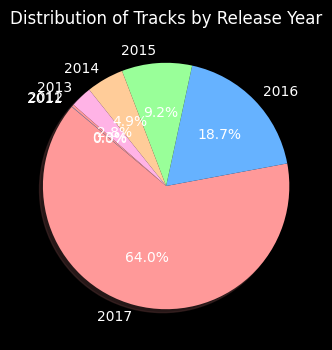

In [32]:
import matplotlib.pyplot as plt



# Prepare data for the pie chart
labels = release_year_distribution['release_year'].astype(str)
sizes = release_year_distribution['track_count']

# Define a custom list of colors for the pie slices
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFB3E6']  # Example colors

# Create the pie chart
plt.figure(figsize=(4, 4))  # Set the figure background to black

# Plot the pie chart
wedges, texts, autotexts = plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=140,  # Rotate the start angle for better placement
    shadow=True,    # Add shadow for a 3D effect
    textprops={'color': 'white'},  # Set text color to white
    # wedgeprops=dict(edgecolor='black')  # Add a black edge to the wedges for clarity
)

# Customize text properties
for text in texts:
    text.set_color('white')  # Set the label text color
for autotext in autotexts:
    autotext.set_color('white')  # Set the percentage text color

# Add title with white color
plt.title('Distribution of Tracks by Release Year', color='white')
# plt.style.use('light_background')
# Show the plot
plt.show()


C:\Users\weams\AppData\Local\Temp\ipykernel_15240\3853421182.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




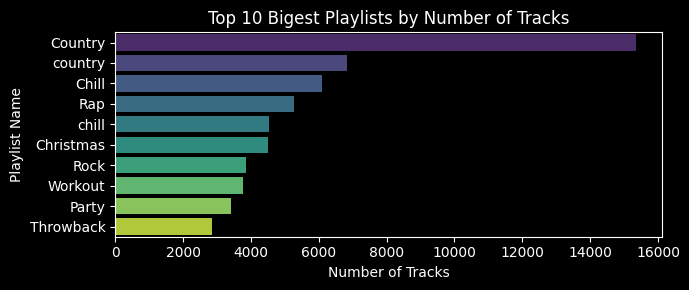

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by playlist name to get the count of tracks
playlist_counts = df.groupby('name')['track_name'].count().reset_index()
playlist_counts.columns = ['playlist_name', 'track_count']
playlist_counts = playlist_counts.sort_values('track_count', ascending=False).head(10)

plt.figure(figsize=(7, 3))
sns.barplot(x='track_count', y='playlist_name', data=playlist_counts, palette='viridis')
plt.title('Top 10 Bigest Playlists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Playlist Name')
plt.tight_layout()
plt.show()

C:\Users\weams\AppData\Local\Temp\ipykernel_15240\3737112888.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




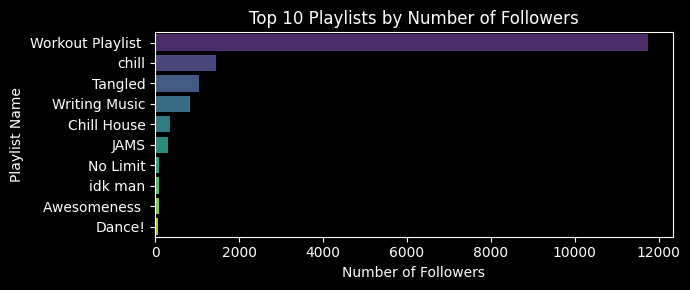

In [34]:
top_playlists_by_followers = final_data.groupby('name')['num_followers'].max().reset_index()
top_playlists_by_followers = top_playlists_by_followers.sort_values('num_followers', ascending=False).head(10)

plt.figure(figsize=(7,3))
sns.barplot(x='num_followers', y='name', data=top_playlists_by_followers, palette='viridis')
plt.title('Top 10 Playlists by Number of Followers')
plt.xlabel('Number of Followers')
plt.ylabel('Playlist Name')
plt.tight_layout()
plt.show()

         playlist_name  average_track_duration
0        Nature Sounds               23.741655
1              stories               13.072191
2                 BACH               12.125003
3           Sleep Time               12.104245
4  Classical Favorites                9.564431


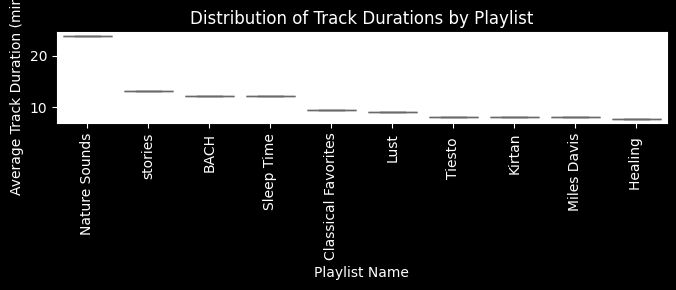

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by playlist and calculate average track duration
average_duration = final_data.groupby('name')['track_duration_m'].mean().nlargest(10).reset_index()
average_duration.columns = ['playlist_name', 'average_track_duration']

print(average_duration.head())


plt.figure(figsize=(7, 3))

# Create the box plot
ax = sns.boxplot(x='playlist_name', y='average_track_duration', data=average_duration,
                 )

# Customize the appearance
ax.set_facecolor('white')  # Set the background color of the plot area
plt.xlabel('Playlist Name', color='white')  # Set x-axis label color
plt.ylabel('Average Track Duration (minutes)', color='white')  # Set y-axis label color
plt.title('Distribution of Track Durations by Playlist', color='white')  # Set title color
plt.xticks(rotation=90 )  # Set x-axis tick labels color
plt.yticks()  # Set y-axis tick labels color
plt.tight_layout()
plt.show()


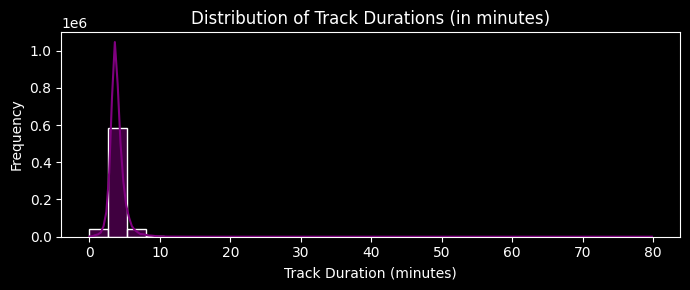

In [36]:
plt.figure(figsize=(7, 3))
sns.histplot(final_data['track_duration_m'], bins=30, kde=True, color='purple')  
plt.title('Distribution of Track Durations (in minutes)')
plt.xlabel('Track Duration (minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

  day_of_week   count
0      Monday   99022
1     Tuesday  109755
2   Wednesday   93115
3    Thursday   94910
4      Friday   98305
5    Saturday   87863
6      Sunday   87598


C:\Users\weams\AppData\Local\Temp\ipykernel_15240\3091676086.py:11: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



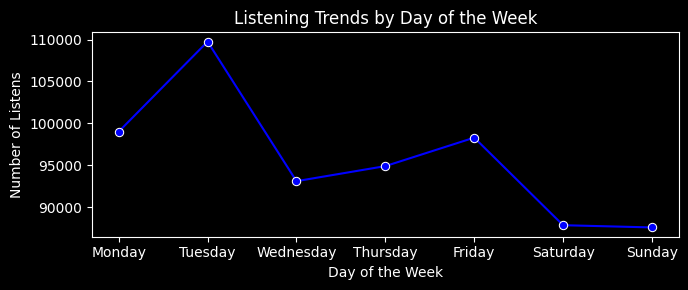

In [37]:
# Extract day of the week
final_data['day_of_week'] = final_data['modified_at'].dt.day_name()

daily_trends = final_data['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()
daily_trends.columns = ['day_of_week', 'count']
print(daily_trends)

plt.figure(figsize=(7, 3))
sns.lineplot(x='day_of_week', y='count', data=daily_trends, palette='viridis',marker='o', color='b')
plt.title('Listening Trends by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Listens')
plt.tight_layout()
plt.show()




In [38]:
print(final_data.columns)
final_data.info()

Index(['name', 'collaborative', 'pid', 'modified_at', 'num_tracks',
       'num_albums', 'num_followers', 'num_edits', 'num_artists',
       'description', 'track_pos', 'artist_name', 'track_uri', 'track_name',
       'album_uri', 'album_name', 'release_year', 'track_duration_m',
       'duration_m', 'day_of_week'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670568 entries, 0 to 670567
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   name              670568 non-null  object        
 1   collaborative     670568 non-null  bool          
 2   pid               670568 non-null  int64         
 3   modified_at       670568 non-null  datetime64[ns]
 4   num_tracks        670568 non-null  int64         
 5   num_albums        670568 non-null  int64         
 6   num_followers     670568 non-null  int64         
 7   num_edits         670568 non-null  int64         

In [39]:
final_data.to_csv('updated_spotify_data.csv', index=False)
print("Data has been saved to updated_spotify_data.csv")

Data has been saved to updated_spotify_data.csv


In [40]:
updated_data = pd.read_csv('updated_spotify_data.csv')

print(updated_data.columns)

Index(['name', 'collaborative', 'pid', 'modified_at', 'num_tracks',
       'num_albums', 'num_followers', 'num_edits', 'num_artists',
       'description', 'track_pos', 'artist_name', 'track_uri', 'track_name',
       'album_uri', 'album_name', 'release_year', 'track_duration_m',
       'duration_m', 'day_of_week'],
      dtype='object')
